
# **Lending Club Case Study**

-  Group Members:
   -  Prabhat Kumar Prabhakar
   -  Shravan Kumar Jha


### Importing necessary libraries beforehand

In [380]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',200)

### Reading the data from the file source

In [381]:
filepath ='/home/prabsy/Desktop/UPGRAD_AI_ML/Lending_club_case_study/'
data_dict_df= pd.read_excel(filepath+'Data_Dictionary.xlsx')
df= pd.read_csv(filepath+'loan.csv')

/home/prabsy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploratory Data Analysis

In [382]:
# Taking a peek at the data head
print(df.shape)
df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [383]:
data_dict_df.loc[91].Description

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

### Inspecting the object type columns

In [384]:
# Lets look at the unique categories in columns with dtype as object
object_type_cols_df = df.select_dtypes(include=['object'])
for col in object_type_cols_df.columns.tolist():
    print('Number of unique values in column '+str(col)+' is ==> {}'.format(object_type_cols_df[col].nunique()))

Number of unique values in column term is ==> 2
Number of unique values in column int_rate is ==> 371
Number of unique values in column grade is ==> 7
Number of unique values in column sub_grade is ==> 35
Number of unique values in column emp_title is ==> 28820
Number of unique values in column emp_length is ==> 11
Number of unique values in column home_ownership is ==> 5
Number of unique values in column verification_status is ==> 3
Number of unique values in column issue_d is ==> 55
Number of unique values in column loan_status is ==> 3
Number of unique values in column pymnt_plan is ==> 1
Number of unique values in column url is ==> 39717
Number of unique values in column desc is ==> 26527
Number of unique values in column purpose is ==> 14
Number of unique values in column title is ==> 19615
Number of unique values in column zip_code is ==> 823
Number of unique values in column addr_state is ==> 50
Number of unique values in column earliest_cr_line is ==> 526
Number of unique value

**Summary**
-  **emp_title** is the job title can vary a lot, hence the value is high
-  **URL** can be diffferent, hence the value is very high, not much useful ion this analysis
-  **desc** also can be very unique, as its a string, not much useful in this analysis
-  **title** (loan title) can again depend person to person hence the value is high
-  **revol_util** is the amount of credit the borrower is using relative to all available revolving credit, this column can also be very specific to borrower hence unique value is large


-  **pymnt_plan** has got just 1 unique value, hence there is no much variance(not statistical variance) that it may help us with inforamtion
-  **initial_list_status** is just 1, this also does adds much to the information
-  **application_type** unique value is also 1, does not give much information like above 2
-  These columns with jsut one unique value can be dropped

In [385]:
# Deleting columns on the basis of reasoning in the summary above
df.drop(columns=['pymnt_plan','initial_list_status','application_type','url','desc'],inplace=True,axis=1)

### Inspecting the numeric type columns

In [386]:
numeric_type_cols_df = df.select_dtypes(include=['float64','int64'])
for col in numeric_type_cols_df.columns.tolist():
    print('Number of unique values in column '+str(col)+' is ==> {}'.format(numeric_type_cols_df[col].nunique()))

Number of unique values in column id is ==> 39717
Number of unique values in column member_id is ==> 39717
Number of unique values in column loan_amnt is ==> 885
Number of unique values in column funded_amnt is ==> 1041
Number of unique values in column funded_amnt_inv is ==> 8205
Number of unique values in column installment is ==> 15383
Number of unique values in column annual_inc is ==> 5318
Number of unique values in column dti is ==> 2868
Number of unique values in column delinq_2yrs is ==> 11
Number of unique values in column inq_last_6mths is ==> 9
Number of unique values in column mths_since_last_delinq is ==> 95
Number of unique values in column mths_since_last_record is ==> 111
Number of unique values in column open_acc is ==> 40
Number of unique values in column pub_rec is ==> 5
Number of unique values in column revol_bal is ==> 21711
Number of unique values in column total_acc is ==> 82
Number of unique values in column out_prncp is ==> 1137
Number of unique values in colum

**Summary**
-  Most of the columns in the later half have either 0, 1 or 2 unique values
-  The columns with 0 unique values will contain all the values as NaN, we need to drop these columns
-  The columns with 1 unique value will contain only 1 value for each row or will contain NaN, thus it does not add much to the variance of the data.
-  Based on further analysis of NaN values we will delete these columns

### 1. Check the percentage of null values in each column

In [387]:
# Calculating the percentage of missing values in the dataframe for each column
# The retured result is then converted into a dataframe for better visualization
def get_missing_percentage(df):
    cols_missing_percentage_df = pd.DataFrame(round(100*(df.isnull().sum()/len(df)),2)).reset_index()
    cols_missing_percentage_df.columns = ['col_name','missing_pecentage']
    return cols_missing_percentage_df


cols_missing_percentage_df = get_missing_percentage(df)

**Summary**
-  There are many columns with null values
-  Many of such columns do not conatin any data (entirely empty)
-  We need to drop those
-  Some have about ~92% to ~97% missing values, we will drop these as well
-  Some columns with missing values of ~32% and ~64% we will look more to decide whether to drop them or not if not dropping then what strategy to apply
-  Rest columns with missing values less than 7%, We will study them to find perfect strategy to impute

####  **1.a Dropping columns with missing values more than 50%**

-  Get columns with missing values more than 50%
-  **'desc'**, around 33% of loan description provided by the borrower is nan, we can drop this column
-  **'mths_since_last_delinq'**, around 66% of borrower's  mths_since_last_delinq is nan
-  **mths_since_last_delinq** can be an important columns based on the domain and the problem we are solving, but we will delete it , to be on the safer side.

In [388]:
# Filterinfg columns having missing values less than 50 %
# Here we have returned the list of such columns, for future use

usable_cols_list= cols_missing_percentage_df[cols_missing_percentage_df['missing_pecentage']<50]['col_name'].tolist()

-  Filtering dtaframe with only usable columns using above column list

In [389]:
# Saving in the same datarame df just to reduce memory usage
df = df[usable_cols_list]

**1.b Dropping rows for columns having very less missing values**

-  Filter away rows of columns having very less missing values

In [390]:
# Similary we can drop rows having very very less missing values for a particular column
# We will see how much rows are we less after dropping and accordingly make decision
# Since its a banking data, we have to be very cautious about the data dropped and is that loss affecting the analysis
# We also need to be very very careful with the imputation technique we use for such columns
cols_havin_very_less_nan = cols_missing_percentage_df[(cols_missing_percentage_df['missing_pecentage']<10) & (cols_missing_percentage_df['missing_pecentage']>0)]['col_name'].tolist()

# dropping
df.dropna(subset=cols_havin_very_less_nan,inplace=True)


-  %loss of rows after deleting rows of columns in cols_havin_very_less_nan containing nan values

In [391]:
print('Percenatage loss of data after remioving the rows of nan values of specific columns is {}%'.format(round(100*(39717-38889)/39717,2)))

Percenatage loss of data after remioving the rows of nan values of specific columns is 2.08%


**Summary**
-  So after deleting rows of columns containing < 2 % of nan values we have just lost 2% of data
-  This is a fair risk that we can take

In [392]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,1,0,0.0,0,0.0,0.0


In [393]:
# Check missing value percentage of columns
get_missing_percentage(df)

,col_name,missing_pecentage
0,id,0.0
1,member_id,0.0
2,loan_amnt,0.0
3,funded_amnt,0.0
4,funded_amnt_inv,0.0
5,term,0.0
6,int_rate,0.0
7,installment,0.0
8,grade,0.0
9,sub_grade,0.0


**Summary**
-   We still have missing value columns after dropping columns and rows
-  **'emp_title'** around 6% borrower have not provided their job title
-  **'emp_length'**, around 2.7% borrower's employment duration is not mentioned or is nan
-  We will drop these as well, to avoid bringing any bias in the data

In [394]:
# df.drop(columns=['emp_title','emp_length'],inplace=True,axis=1)

In [395]:
df.shape

(36431, 49)

In [396]:
# Now check if any of the column contains NaN values
df.isnull().any()

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths                False
open_acc                      False
pub_rec                       False
revol_bal                   

- No missing values in any column of the dataframe

In [397]:
# Looking at the data again
df.nunique().sort_values()


tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
term                              2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
home_ownership                    4
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         38
addr_state                       48
issue_d                          51
total_acc                        79
last_credit_pull_d               96
last_pymnt_d                     97
int_rate                        333
earliest_cr_line                510
zip_code                        805
loan_amnt                   

**Summary**
-  **tax_liens** : contains only one unique value, not adding much information here, can be dropped
-  **delinq_amnt** : entire dataset is '0',contains only 1 unique value, therefore can be removed.
-  **chargeoff_within_12_mths**: Dropping as there is not much information except 1 value, like above 2
-  **acc_now_delinq**: dropping with above reasoning
-  **policy_code**: dropping with above reasoning
-  **collections_12_mths_ex_med**: dropping with the above reasoning
-  **zip_code**: first 3 digits of the 5 digit zip code are only visible, also it is redundant with column addr_state, does not contribute to our analysis
-  **id**: Its a random number, no use in analysis
-  **member_id**: Is a random number assigned to a borrower, hence no use in analysis, dropping


####  Deleting the above columns

In [398]:
df.drop(columns=['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq',\
                 'policy_code','collections_12_mths_ex_med','zip_code','member_id','id'],inplace=True,axis=1)

In [399]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


**Summary**
-  On checking we found that most of the datatype is consistent with the above output
-  There are columns with data type as object, we can convert them to float or integer
-  The columns **'int_rate' and 'revol_util'** has values with **%** in it that makes it object type
-  This can be split or stripped off of the trailing **%** character to convert it to float type
-  Similarly for column **'term'** we can strip the trailing **months** and convert it into integer type

### **2. Check the datatype consistency**

In [400]:
print(df.info())
print('\nShape of the datat is {}'.format(df.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36431 non-null  int64  
 1   funded_amnt              36431 non-null  int64  
 2   funded_amnt_inv          36431 non-null  float64
 3   term                     36431 non-null  object 
 4   int_rate                 36431 non-null  object 
 5   installment              36431 non-null  float64
 6   grade                    36431 non-null  object 
 7   sub_grade                36431 non-null  object 
 8   emp_title                36431 non-null  object 
 9   emp_length               36431 non-null  object 
 10  home_ownership           36431 non-null  object 
 11  annual_inc               36431 non-null  float64
 12  verification_status      36431 non-null  object 
 13  issue_d                  36431 non-null  object 
 14  loan_status           

**Summary**
-  The data contains 3 data types (Float,Integer,Object)
-  Since there can be cases where the data type given by above method does not match the actual data
-  We need to confirm these data types are consistent with the data, and need to change them if its not consistent
-  This would be a manual inspection process, to go through each column and check for datatype consistency

In [401]:
# Strip and convert 'int_rate' column into float type
df['int_rate'] = df.int_rate.str.rstrip('%').astype('float64')

# Strip and convert 'revol_util' column into float type
df['revol_util'] = df.revol_util.str.rstrip('%').astype('float64')

# Strip and convert 'months' column into int type
df['term'] = df.term.str.rstrip(' months').astype('int64')

-  There are few columns which has month-year information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.
-  These columns are:
          1. issue_d
          2. earliest_cr_line
          3. last_pymnt_d
          4. last_credit_pull_d

In [402]:
# Converting the data type from object to Datetime
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')

-  **earliest_cr_line**: The month the borrower's earliest reported credit line was opened. 
-  Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

#### Separating the month and year

In [403]:

df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year

In [404]:
df['earliest_cr_line_year']

1        1999
3        1996
4        1996
5        2004
6        2005
         ... 
39433    1995
39475    1979
39551    2000
39562    2000
39623    1997
Name: earliest_cr_line_year, Length: 36431, dtype: int64

In [405]:
df.groupby('earliest_cr_line_year').loan_amnt.count()


earliest_cr_line_year
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     969
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3033
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
2046       1
2050       1
2054       1
2056       1
2062       3
2063       4
2064       2
2065       6
2066       7
2067      12
2068      12
Name: loan_amnt, dtype: int64

**Summary**
-  We can see the year goes to the future, this is beacaue of the problem Y2K
-  Lets solve this issue

In [406]:
print('max value of year in earliest credit line {}'.format(df['earliest_cr_line_year'].max()))
print('max value of year in earliest credit line {}'.format(df['earliest_cr_line_year'].min()))

max value of year in earliest credit line 2068
max value of year in earliest credit line 1969


In [407]:

df.loc[df['earliest_cr_line_year'] > 2008 , 'earliest_cr_line_year'] = df['earliest_cr_line_year'] - 100

In [408]:
df.groupby('earliest_cr_line_year').loan_amnt.count()


earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     969
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3033
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

#### similar process with column 'issue_d'

In [409]:
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year

#### Drop duplicate rows, just in case, if there is any

In [410]:
df=df.drop_duplicates()


-  According to the data_dictionary file description for this field, **emp_length**: Employment length in years. - -  Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
-  Let's encode this column to have values between 0 and 10.

In [411]:
emp_length_encode = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
df = df.replace({"emp_length": emp_length_encode })


In [412]:
# save this data into a file
df.to_csv(filepath+'cleaned_loan.csv', index=False)

## ANALYSIS ON THE READY DATA

In [413]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,1996,12,2011
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011


In [414]:
df.loan_status.value_counts()


Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

**Summary**
-  Leaving the current loan status, we need to analyse only on the 'Fully Paid' and 'Charfed off'

In [415]:
# Filtering just Fully Paid and Charged Off loan status from parent dataframe
df = df[df['loan_status'].isin(['Fully Paid','Charged Off'])]

## Univariate analysis

-  **Distribution of borrowers who fullypaid the loan and who were charged off**

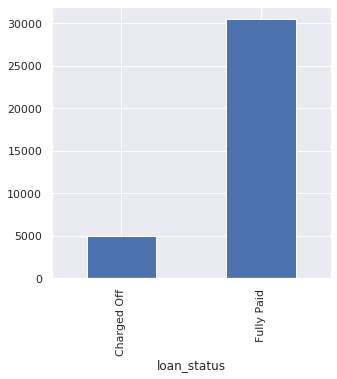

In [416]:
plt.figure(figsize=(5,5))
ax = df.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

In [417]:
print('The percentage of Charged off customers {}'.format((100*df[df['loan_status'] == 'Charged Off'].loan_status.count())/df.shape[0]))
print('The percentage of Fully Paid {}'.format((100*df[df['loan_status'] == 'Fully Paid'].loan_status.count())/df.shape[0]))

The percentage of Charged off customers 13.974268344408314
The percentage of Fully Paid 86.02573165559168


-  **Percentage of Loan amount recovered for each category Charged Off and Fully Paid borrowers**

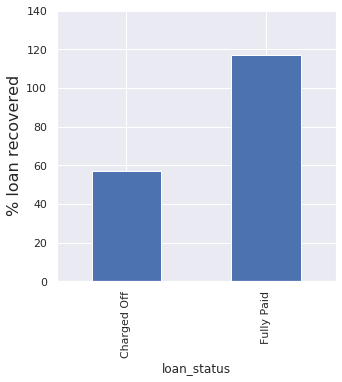

In [418]:
plt.figure(figsize=(5,5))
ax = (df.groupby('loan_status').total_pymnt.sum() * 100 / df.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)

In [419]:
print('percentage of loan amount recovered from Charged off borrowers {}'.format((100*df[df['loan_status'] == 'Charged Off'].total_pymnt.sum())/df[df['loan_status'] == 'Charged Off'].loan_amnt.sum()))
print('percentage of loan amount recovered from Fully Paid borrowers {}'.format((100*df[df['loan_status'] == 'Fully Paid'].total_pymnt.sum())/df[df['loan_status'] == 'Fully Paid'].loan_amnt.sum()))

percentage of loan amount recovered from Charged off borrowers 57.122815937904946
percentage of loan amount recovered from Fully Paid borrowers 117.2422749526031


-  The loan amount recovered from Fully Paid customers are more than 100% because of the it also includes interest obtained from the lended amount
-  This is not the case with the defaulters as they are sort in principal amount itself

In [420]:

# Plot for a given column buckets against loan_status
def plot_buckets_vs_loan_status(dataframe, col, loan_status):
    groups_count = dataframe.groupby(['loan_status',col])[col].count()
    count = dataframe.groupby(col)[col].count()
    percentages = groups_count.unstack() * 100 / count.T
    ax = percentages.loc[loan_status].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loan_status)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [421]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def dist_box_plot(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [422]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, col, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (dataframe[col].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(col, fontsize=12)
    plt.subplot(1, 2, 2)
    values = (dataframe.loc[dataframe['loan_status']=='Charged Off'][col].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)


In [423]:
# This function crfeates bar plots for categorical columns passed in the parameter cat_col_list
def create_bar_plots(df, cat_col_list):
    rows = int(len(cat_col_list)/2)
    for idx, val in enumerate(cat_col_list, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('Paired'))

    plt.tight_layout()

**Analysing Variable: loan_amnt**
- Meaning in Data_Dictionary: The listed amount of the loan applied for by the borrower.

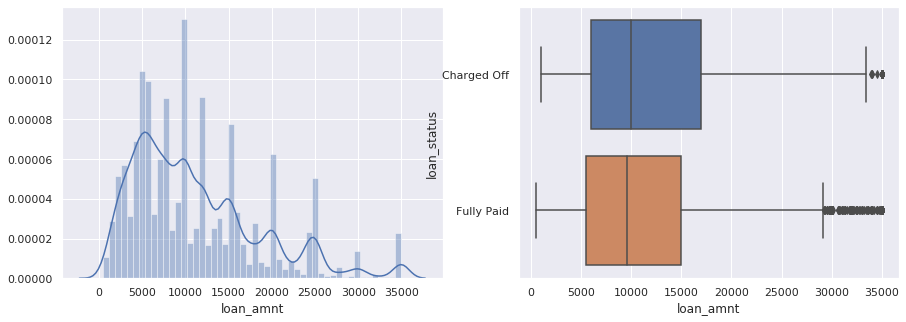

In [424]:
dist_box_plot(df, 'loan_amnt')

In [425]:
df.groupby('loan_status')['loan_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4942.0,12285.506880,8064.946352,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30423.0,10945.992341,7181.841002,500.0,5500.0,9600.0,15000.0,35000.0


**Summary**
-  The displot says the distribution is not normal, its right skewed
-  Most of the loans given are less than 15000
-  There is regular spike in the loan sanction qty at every interval of 5000 approx
-  We will study this separately at constant increase of loan disbursment numbers at every 5000 interval
-  The mean of the Fully paid and Charged off borrowers are close
-  Fully paid customers have been given exceptionaly high loan amount, as there are many outliers. This is a good evaluation of reliable customers
-  There are some customers who have been given very high loan amount
-  This can lead to heavy loss to the organization

In [426]:
# Binning the loan amount in equal bins with interval of 5000
# Since we saw spikes in the % loan sanctioned at every 5000 interval of loan amount approximately
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'],[x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

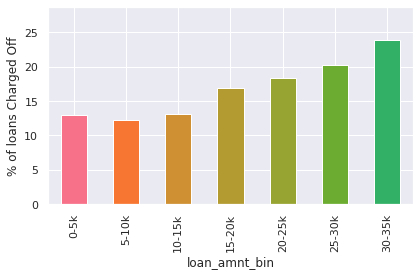

In [427]:
# Plotting the loan amount bins against Charged Off loan_status
plot_buckets_vs_loan_status(df, 'loan_amnt_bin','Charged Off')

**Summary**
-  Charged off borrowers percentage has increased almost at a constant rate
-  The borrowers in charged off type at higher bucket of loan amount can lead to higher loss
-  The higher the lan amount bucket , higher the number of defaulters, higher the loss

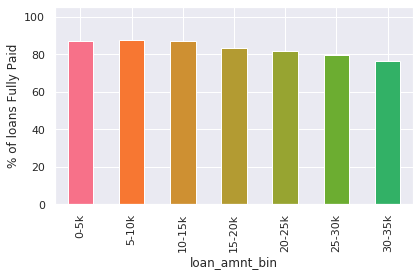

In [428]:
# Plotting the loan abount bins against Fully Paid loan_status
plot_buckets_vs_loan_status(df, 'loan_amnt_bin','Fully Paid')

**Summary**
-  In Fully paid the % of borrowers are high in lower bucket
-  In the higher bucket the % of borrowers are comaratively less
-  This concludes that if we give very high loan amount to customers, they are more susceptable to default or not pay back

## Column wise analysis
-  **Categorical Columns**

In [429]:
data_dict_df[data_dict_df.LoanStatNew=='pub_rec_bankruptcies'].loc[86].Description

'Number of public record bankruptcies'

-  **home_ownership:-** The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
-  **term:-** The number of payments on the loan. Values are in months and can be either 36 or 60.
-  **verification_status:-** Indicates if income was verified by LC, not verified, or if the income source was verified
-  **purpose:-** A category provided by the borrower for the loan request.
-  **grade:-** LC assigned loan grade
-  **pub_rec_bankruptcies:-** Number of public record bankruptcies

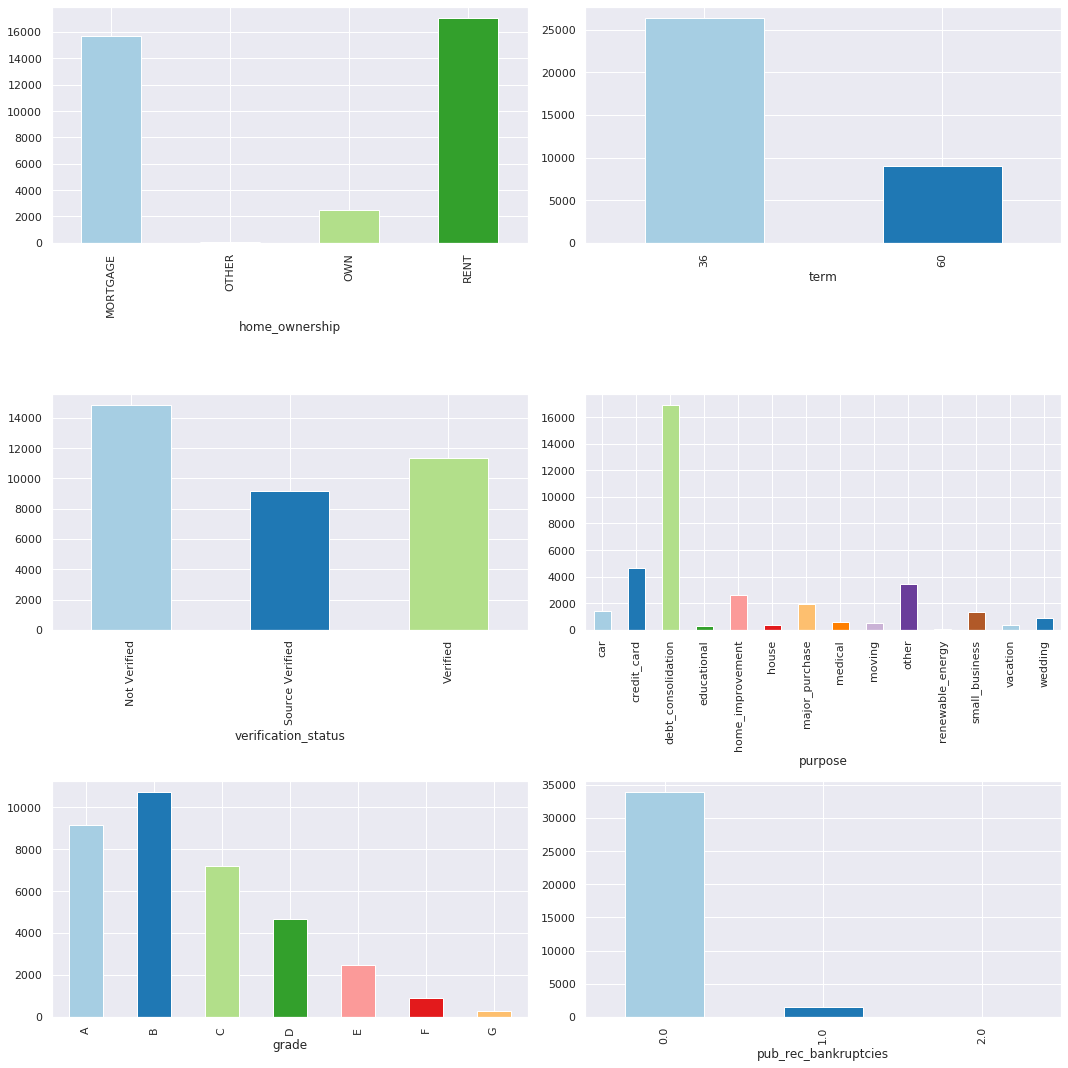

In [430]:
plt.figure(figsize=(15,15))
create_bar_plots(df, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

**Summary**
-  Very less of home_ownership column value is owned, most of the borrwers live in either Mortgaged or Rented house, **we can look how many of them are in the Charged Off loan status type**
-  Most of the bowrrower have selected 36 months term
-  Most of the cutomers are not verified, **we need to check how many of them are in Charged Off loan_status type**
-  A large borrowers have borrowed loan for the purpose of debt_consolidation
-  Most of the customers are in the A,B,C Category of grade
-  There are very few borrowers with public record of bankrupcies

In [431]:
def plot_bar(df,loan_status,grp_by_col):
    temp = df[df['loan_status']==loan_status]
    groups_count = temp.groupby([grp_by_col])[grp_by_col].count()
    count = len(temp)
    percentages = groups_count * 100 / count
    ax = percentages.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loan_status)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    plt.title(loan_status)
    return ax




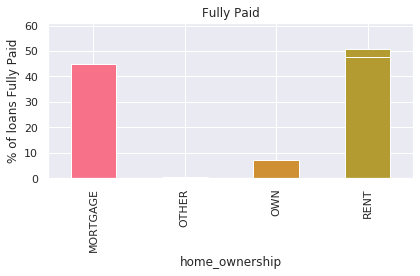

In [432]:
plot_bar(df,'Charged Off','home_ownership')
plot_bar(df,'Fully Paid','home_ownership')

**Summary**
-  Most of the borrowers who are Charged Off have rented or Mortgaged in home_ownership
-  Very less amount of them own thier own house
-  Clearly Mortgaged or Rented(91% of Charged Off) borrowers are more likely to be defaulters
-  But Fully paid customers are also in the same category, they mostly are in rented or mortgaged

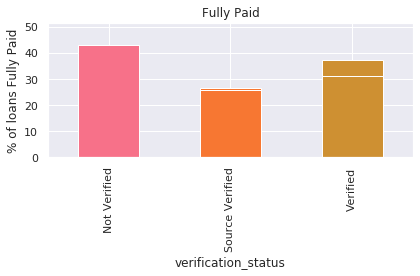

In [433]:

plot_bar(df,'Charged Off','verification_status')
plot_bar(df,'Fully Paid','verification_status')

**Summary**
-  Not much difference in the distribution of verification status of Charged Off and Fully Paid borrowers

### Term

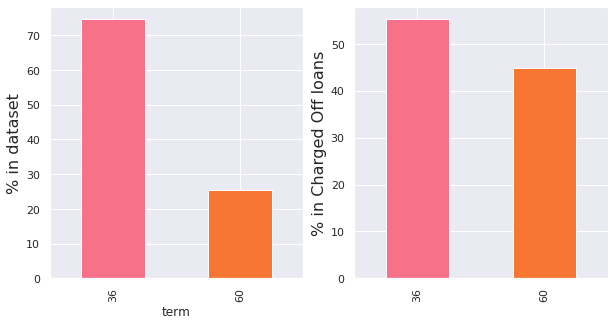

In [434]:
plt.figure(figsize=(10,5))
plot_percentages(df, 'term')

**Summary**
-  In the entire data set the 75% loan is sanctioned for a period of 36 months(3 Years) and 25% for the period of 60 months (5 months)
-  In Charged Off Loan status 43% of the borrowers are santioned for 5 years duration
-  As the term increased the defaultability of the borrower has also increased
-  Sanctioning loan for a longer period of term 'may' play role for borrowers to default

### Col-: Purpose

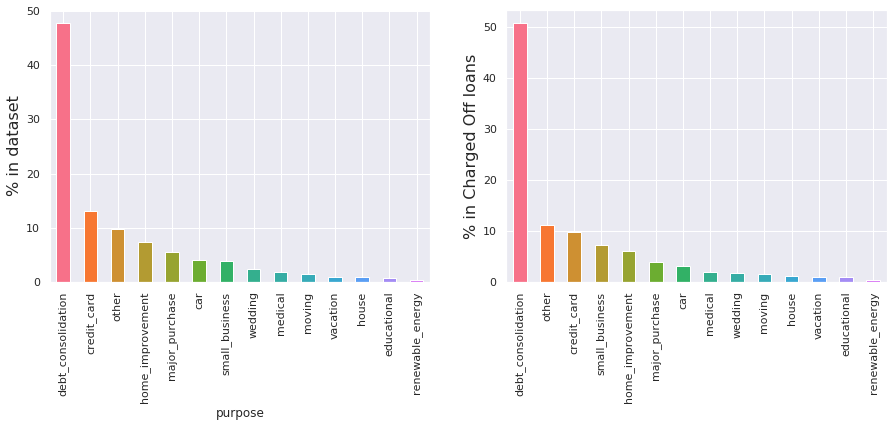

In [435]:

plt.figure(figsize=(15,5))
plot_percentages(df, 'purpose')

**Summary**
-  Most of the borrowers in both entire dataset and specifically in case of Charged off borrowers have borrowed loan for the purpose of debt consoldation

## Col:- pub_rec_bankruptcies

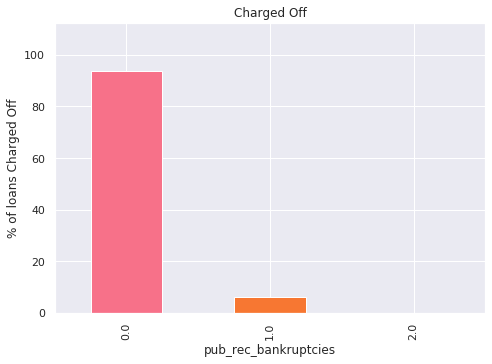

In [436]:

plt.figure(figsize=(7,5))
plot_bar(df,'Charged Off','pub_rec_bankruptcies')

## Analysing with respect to Interest Rate, col:- int_rate

In [437]:
df.int_rate.describe()

count    35365.000000
mean        11.983494
std          3.702615
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<Figure size 1080x360 with 0 Axes>

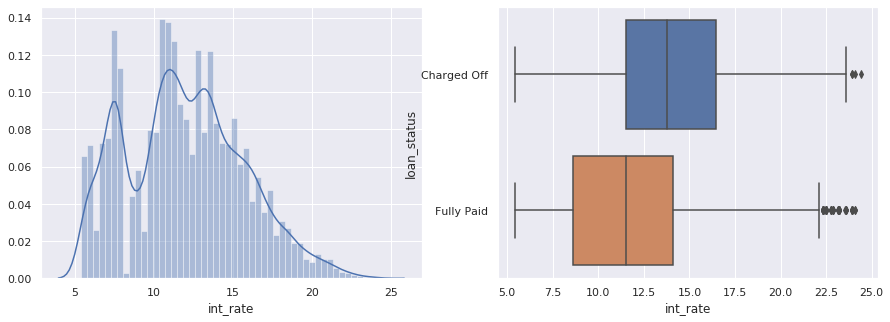

In [438]:
plt.figure(figsize=(15,5))
plot_distribution(df, 'int_rate')

In [439]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4942.0,13.930376,3.647785,5.42,11.49,13.79,16.45,24.40
Fully Paid,30423.0,11.667236,3.613794,5.42,8.59,11.49,14.09,24.11


**Summary**
-  Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
-  The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases.

In [440]:
df['interest_rate_buckets'] = round(df['int_rate'])

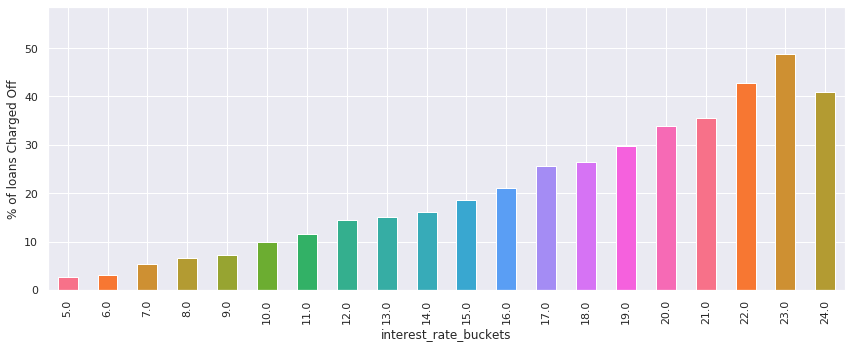

In [441]:
plt.figure(figsize=(12,5))
plot_buckets_vs_loan_status(df, 'interest_rate_buckets','Charged Off')

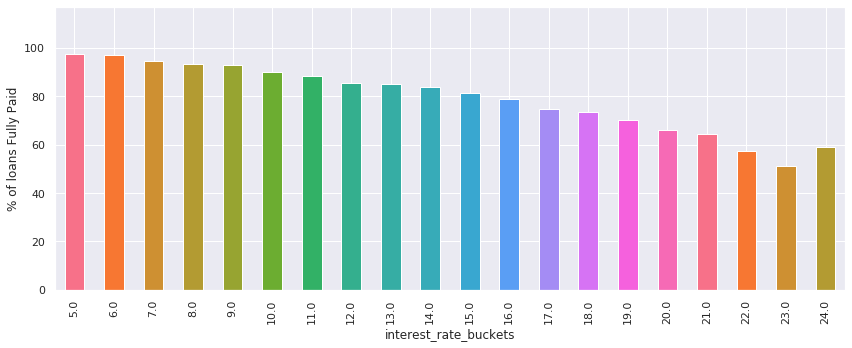

In [442]:
plt.figure(figsize=(12,5))
plot_buckets_vs_loan_status(df, 'interest_rate_buckets','Fully Paid')

**Summary**
-  Very less Charged Off borrowers are giben low interest rate, mostly these customers have very high interest rate, as the risk of defaulting is high
-  In case of Fully Paid customers the risk is low hence most of the Fully Paid customers are given less interest rates

### Col:- Installment
-  Data_Dictionary: The monthly payment owed by the borrower if the loan originates.

In [443]:
# Looking at the descriptive statistics of this column
df.installment.describe()

count    35365.000000
mean       324.045146
std        207.149207
min         16.080000
25%        167.840000
50%        280.620000
75%        426.560000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1080x360 with 0 Axes>

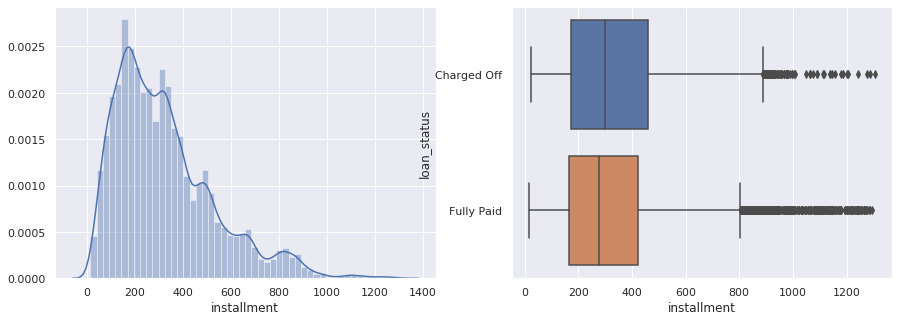

In [444]:
plt.figure(figsize=(15,5))
plot_distribution(df, 'installment')

In [445]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4942.0,338.814334,214.535950,22.79,172.4125,298.33,458.1825,1305.19
Fully Paid,30423.0,321.645997,205.827863,16.08,167.3000,278.24,422.3150,1295.21


**Summary**
-  The distribution is right skewed
-  the mean instalment of Charged Off is comaratively high than fully paid

## Col:- Grade and Subgrade

In [446]:
df.grade.value_counts()

B    10718
A     9140
C     7180
D     4662
E     2481
F      902
G      282
Name: grade, dtype: int64

In [447]:
df.sub_grade.value_counts(normalize=True).head()


A4    0.075272
B3    0.073208
A5    0.070324
B5    0.069108
B4    0.063537
Name: sub_grade, dtype: float64

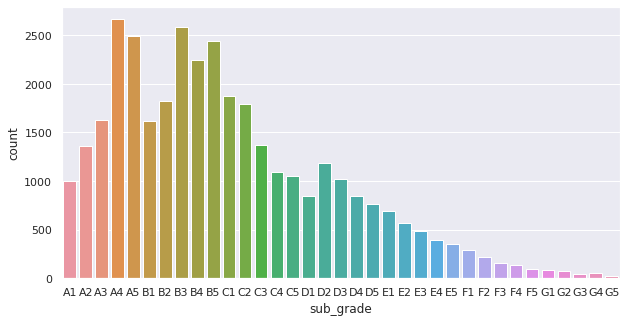

In [448]:
plt.figure(figsize=(10,5))
sns.countplot(df['sub_grade'], order=sorted(df.sub_grade.unique()))
plt.show()

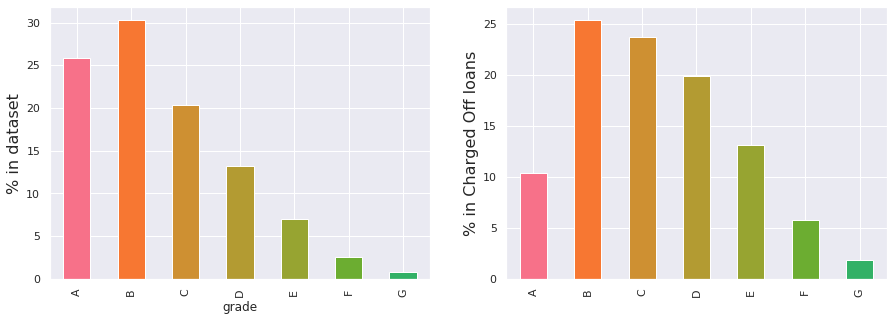

In [449]:
plt.figure(figsize=(15,5))
plot_percentages(df, 'grade', True)

**Summary**
-  Grade A and B are comparatively safe
-  Grade D,E,F,F are more likely to default, hence mostly unsafe

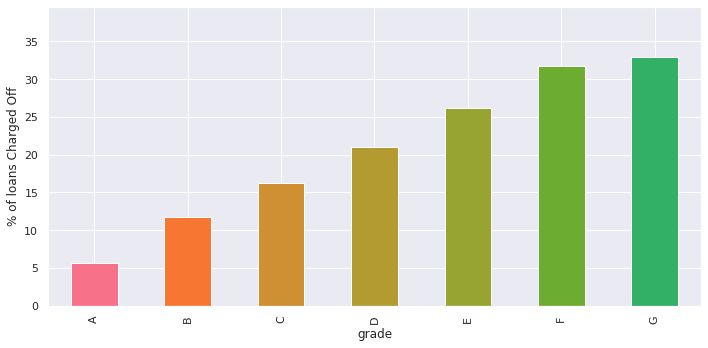

In [450]:
plt.figure(figsize=(10,5))
plot_buckets_vs_loan_status(df, 'grade','Charged Off')

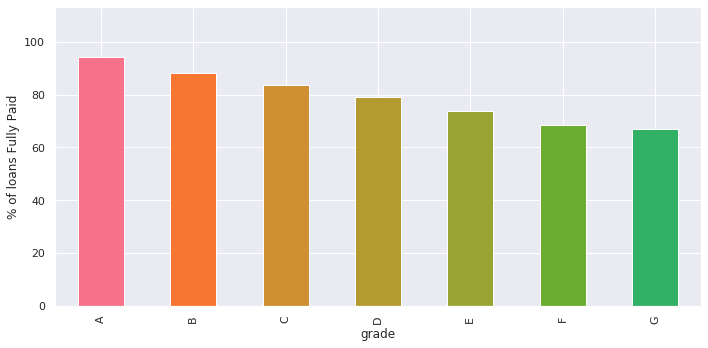

In [451]:
plt.figure(figsize=(10,5))
plot_buckets_vs_loan_status(df, 'grade','Fully Paid')

**Summary**
-  Most of the borrowers n Charged Off falls in grade C,D,E,F and very less from Grade A and B
-  Higher the grade in this Chronolgy, more likely the borrower would default
-  Opposite is the case with Fully Paid customers
-  Lending Club grading system makes sense

<Figure size 720x360 with 0 Axes>

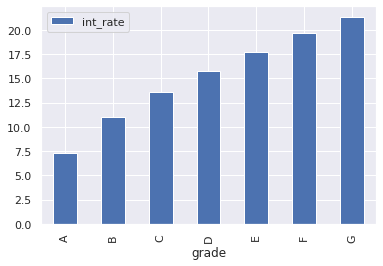

In [452]:
plt.figure(figsize=(10,5))
df.groupby(['grade']).agg({'int_rate':'mean'}).plot.bar()

**Summary**
-  Clearly average interest rate increase as the grading chronology increases, since the defaultability also increases with the same order of grading

## Col: emp_title

In [469]:
emp_title_top_10 = df.emp_title.value_counts(normalize=False).head(10)
emp_title_top_10

US Army              128
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
UPS                   51
USAF                  51
US Air Force          50
Walmart               44
Name: emp_title, dtype: int64

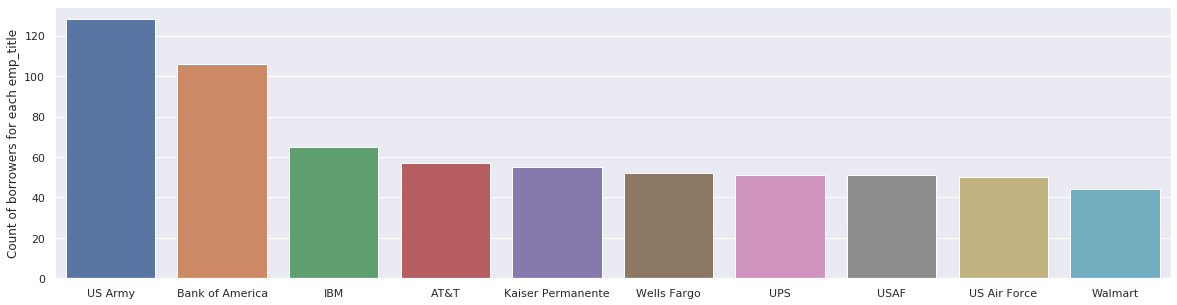

In [470]:
plt.figure(figsize=(20,5))
a=sns.barplot(x=emp_title_top_10.index, y=emp_title_top_10.values)
a.set_ylabel('Count of borrowers for each emp_title')
plt.show()

**Summary**
-  Most of the borrowers are from the US Army, then Bank of America follwed by IBM and AT&T.

## Col:- emp_length

In [471]:
# Getting the descriptive statistics for the column
df.emp_length.value_counts(normalize=True)

10    0.227004
2     0.115397
0     0.112484
3     0.108384
4     0.090655
5     0.086046
1     0.083670
6     0.058306
7     0.046317
8     0.038484
9     0.033253
Name: emp_length, dtype: float64

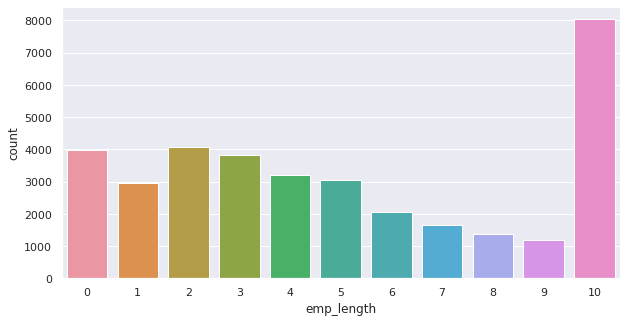

In [472]:
plt.figure(figsize=(10,5))
sns.countplot(df['emp_length'], order=sorted(df.emp_length.unique()))
plt.show()

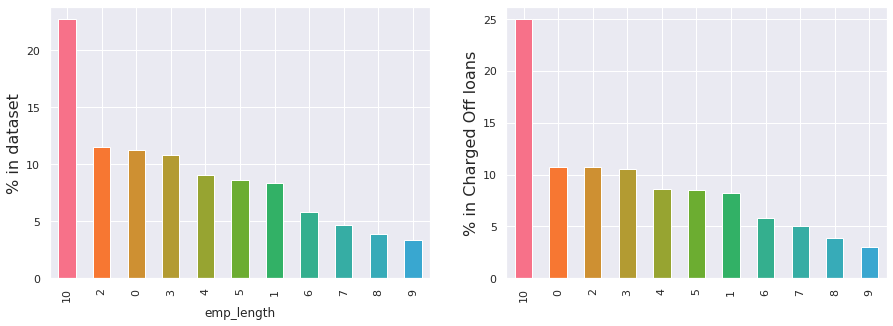

In [465]:
plt.figure(figsize=(15, 5))
plot_percentages(df, 'emp_length')

**Summary**
-  Most of the borrowers have job for atleat 10 or above years
-  Most of the defaulters also have job for atleat 10 or above years
-  Could not get much conclusion from this

## Col:- annual_inc

In [474]:
# defining custom percentile to get nore coarser result
df.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536500e+04
mean     6.909774e+04
std      6.396843e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

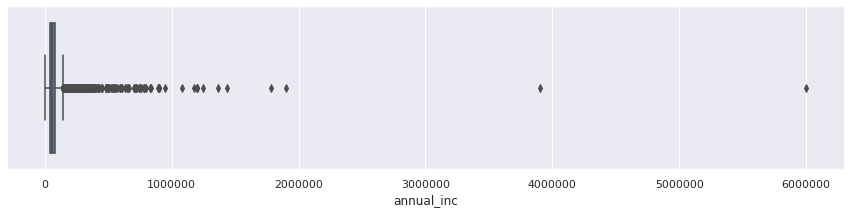

In [468]:

plt.figure(figsize=(15, 3))
sns.boxplot(x=df['annual_inc'], data=df)

-  There are outliers in the annual_inc, clearly some of the customers may have extremely high income

In [475]:
# removing outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df1 = df[np.abs(df.annual_inc-df.annual_inc.mean()) <= (3*df.annual_inc.std())]

In [478]:
df1.annual_inc.describe()

count     35120.000000
mean      66257.119920
std       35750.223389
min        4000.000000
25%       41004.000000
50%       59450.500000
75%       81978.000000
max      260000.000000
Name: annual_inc, dtype: float64

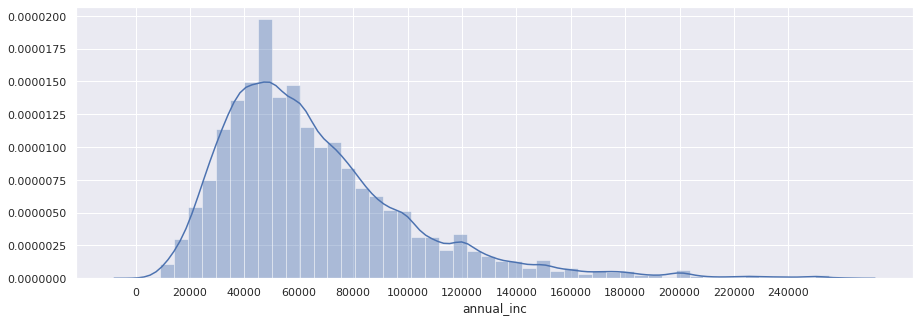

In [479]:

plt.figure(figsize=(15, 5))
sns.distplot(df1['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [488]:
#Create income bin
df['income_bin'] = df['annual_inc']/20000
df['income_bin'] = df['income_bin'].astype(int)

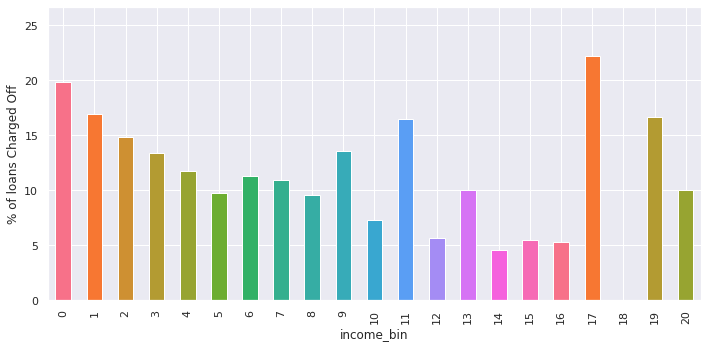

In [489]:
plt.figure(figsize=(10,5))
ax = plot_buckets_vs_loan_status(df.loc[df['income_bin']<21], 'income_bin','Charged Off')


## Col:- issue_d_year, issue_d_month vs Charged Off

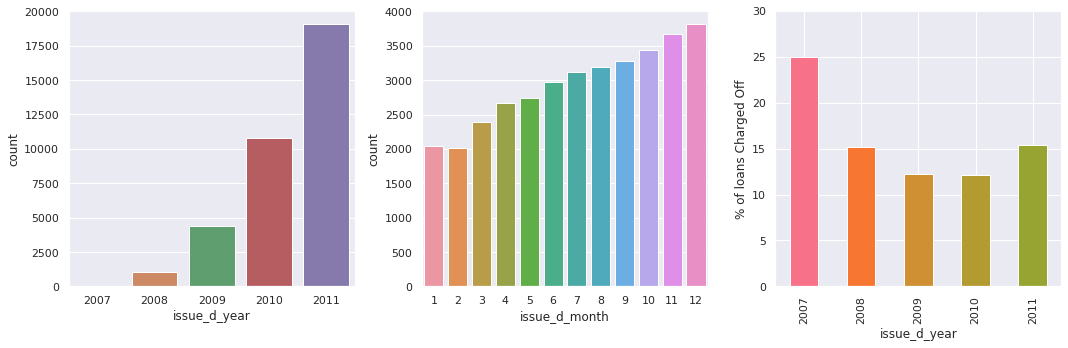

In [501]:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(df['issue_d_year'], order=sorted(df.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(df['issue_d_month'], order=sorted(df.issue_d_month.unique()))

plt.subplot(1, 3, 3)
plot_buckets_vs_loan_status(df, 'issue_d_year','Charged Off')

plt.show()

**Summary**
-  Lending club has been giving loans increasingly from 2007 to 2011
-  In 2010,2011 loan sanctioning has increased very much
-  In a year typicaly loan sanctioning increases from Jan to Dec
-  Year of sanctioning loan has no major effect on getting default

In [505]:
df.addr_state.value_counts(normalize=True).head(10)


CA    0.180857
NY    0.095744
FL    0.071681
TX    0.069362
NJ    0.047137
IL    0.039050
PA    0.038824
VA    0.035600
GA    0.035431
MA    0.033395
Name: addr_state, dtype: float64

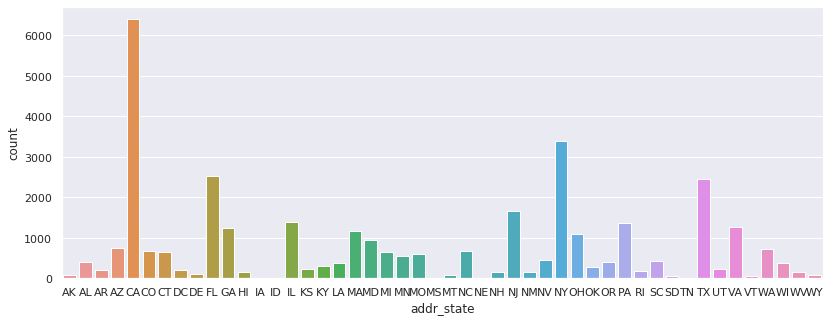

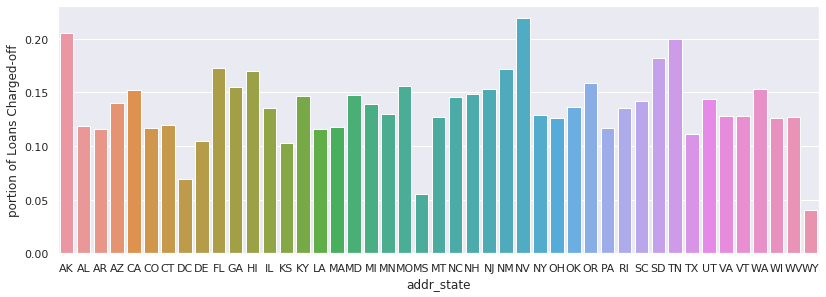

In [507]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(df['addr_state'], order=sorted(df.addr_state.unique()))
charge_off_count = df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
plt.show()

**Summary**
-  Most of the loan are from California, New York, Florida

## Col: dti

In [509]:

df.dti.describe()

count    35365.000000
mean        13.404126
std          6.636652
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

<Figure size 720x360 with 0 Axes>

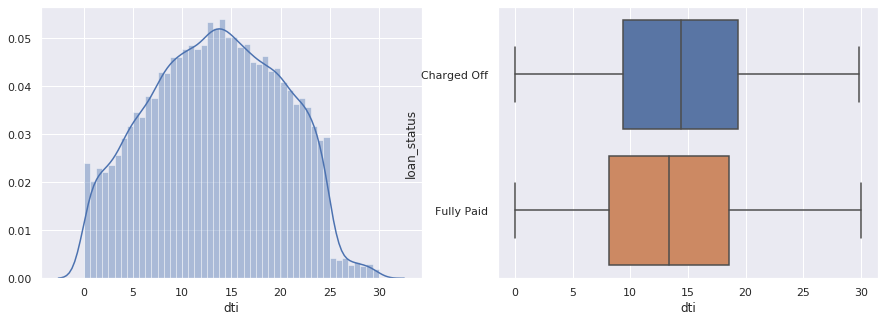

In [510]:

plt.figure(figsize=(10,5))
plot_distribution(df, 'dti')

In [512]:
# Creating column  to store bins for dti
df['dti_bin'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

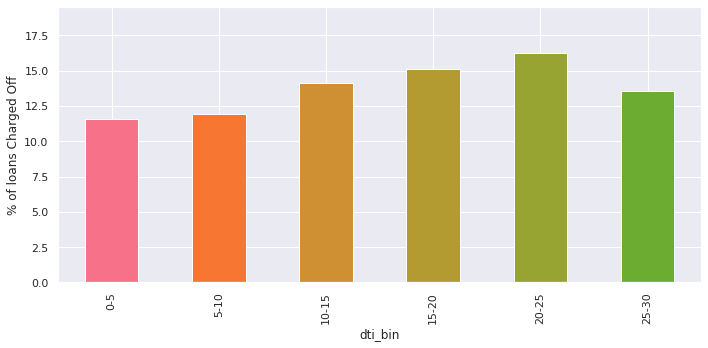

In [516]:
plt.figure(figsize=(10,5))
plot_buckets_vs_loan_status(df, 'dti_bin','Charged Off')

**Summary**
-  The Charged Off borrowers are at higher bins of dti

## Col; delinq_2yrs

In [517]:
df.delinq_2yrs.value_counts(normalize=True)

0     0.891588
1     0.083105
2     0.017362
3     0.005344
4     0.001499
5     0.000594
6     0.000283
7     0.000113
8     0.000057
11    0.000028
9     0.000028
Name: delinq_2yrs, dtype: float64

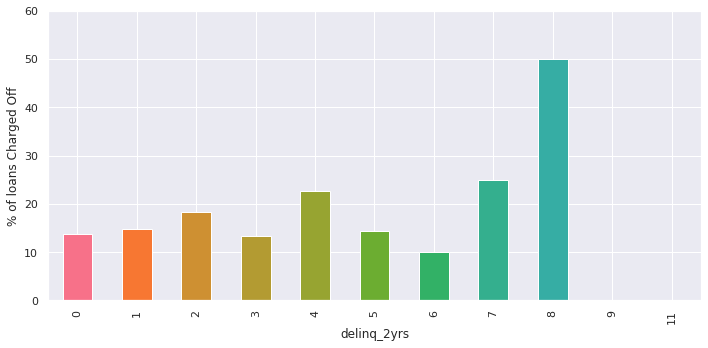

In [518]:
plt.figure(figsize=(10,5))
plot_buckets_vs_loan_status(df, 'delinq_2yrs','Charged Off')

**Summary**
-  There are higher the delinq_2yrs higher possibility of defaulting

## Col: earliest_cr_line_year

In [519]:
df.earliest_cr_line_year.value_counts(normalize=True).head()


2000    0.083303
1999    0.076205
1998    0.072642
2001    0.065262
1997    0.062406
Name: earliest_cr_line_year, dtype: float64

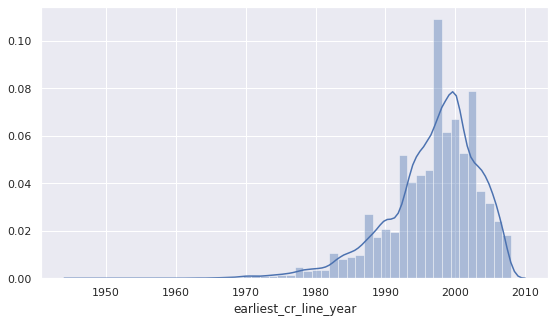

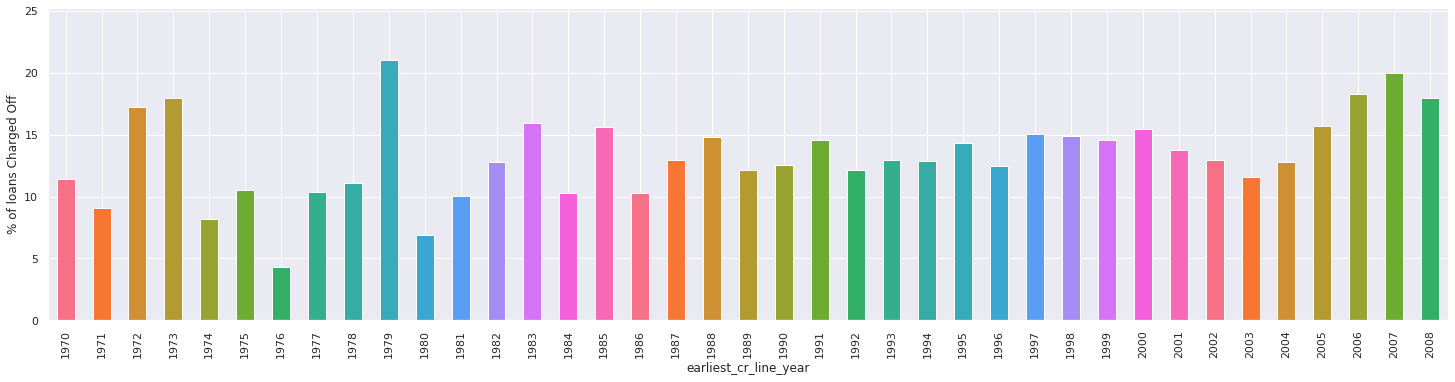

In [523]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(df['earliest_cr_line_year'])
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plot_buckets_vs_loan_status(df.loc[df['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year','Charged Off')
plt.show()

**Summary**
-  New customers seem to get default more than the older ones

## col: inq_last_6mths
-  The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [524]:
df.inq_last_6mths.value_counts(normalize=True)


0    0.485876
1    0.276375
2    0.147236
3    0.076403
4    0.007917
5    0.003478
6    0.001527
7    0.000877
8    0.000311
Name: inq_last_6mths, dtype: float64

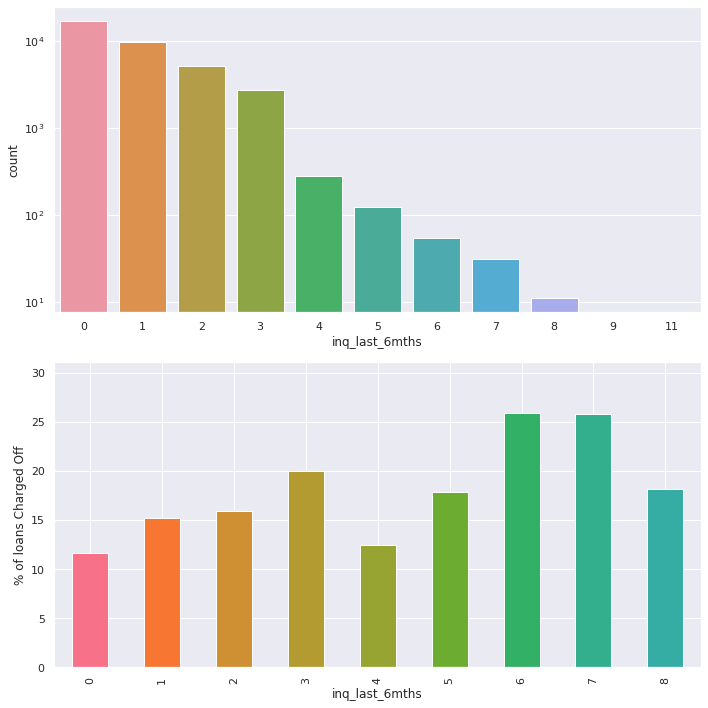

In [526]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(df['inq_last_6mths'], order=sorted(df.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plot_buckets_vs_loan_status(df, 'inq_last_6mths','Charged Off')
plt.show()

**Summary**
-  ~48% of the borrowers do not make any inquiry
-  Borrowers with 1 or more enquiries are most likely to default


## Col: open_acc
-  The number of open credit lines in the borrower's credit file.

In [527]:
df.open_acc.describe()


count    35365.000000
mean         9.332080
std          4.374926
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

<Figure size 1080x360 with 0 Axes>

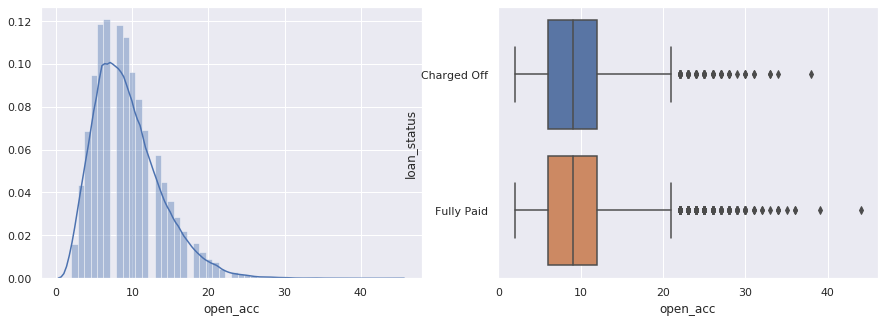

In [528]:
plt.figure(figsize=(15,5))
plot_distribution(df, 'open_acc')
plt.show()

In [529]:
df.groupby('loan_status')['open_acc'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4942.0,9.307770,4.491934,2.0,6.0,9.0,12.0,38.0
Fully Paid,30423.0,9.336029,4.355684,2.0,6.0,9.0,12.0,44.0


**Summary**
-  Most of the borrowers have close to 9 credit lines open
-  Open credit lines of Charged Off and fully Paid borrowers are same

## Col: pub_rec
-  Number of derogatory public records.

In [531]:
df.pub_rec.value_counts(normalize=True)


0    0.947717
1    0.050785
2    0.001244
3    0.000198
4    0.000057
Name: pub_rec, dtype: float64

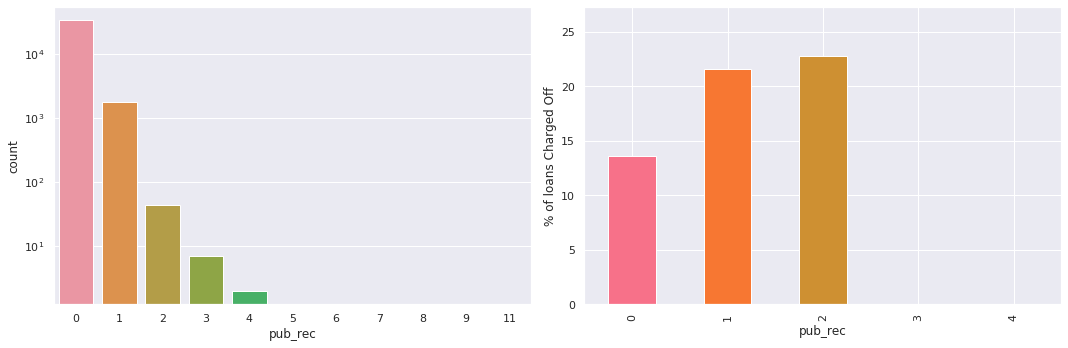

In [533]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(df['pub_rec'], order=sorted(df.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plot_buckets_vs_loan_status(df, 'pub_rec','Charged Off')
plt.show()

**Summary**
- Most of the bowrrowers do not have any public derogatory records  
- customers having 1 or more derogatory records are more likely to default

## Col: revol_bal
-  Total credit revolving balance

In [535]:
df.revol_bal.describe()


count     35365.000000
mean      13368.218465
std       15678.724846
min           0.000000
25%        3783.000000
50%        8935.000000
75%       17065.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [537]:
# remove outliers
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = df[np.abs(df.revol_bal-df.revol_bal.mean()) <= (3*df.revol_bal.std())]

In [538]:
df['revol_bal_log'] = df['revol_bal'].apply(lambda x : np.log(x+1))


/home/prabsy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


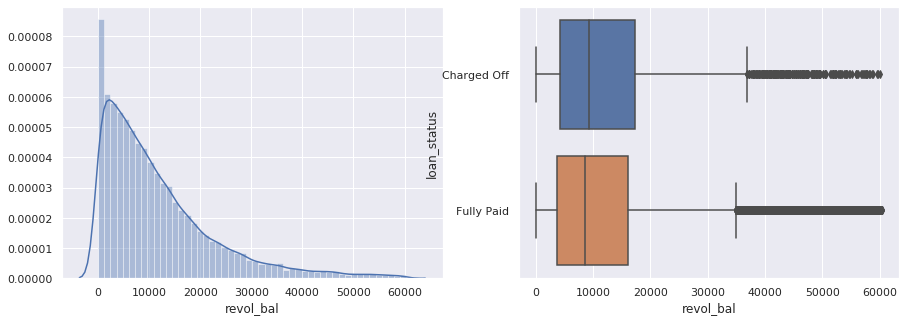

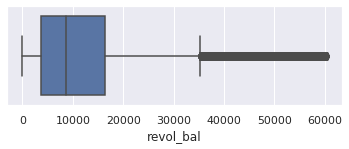

In [539]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(df['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['revol_bal'], y=df['loan_status'], data=df)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=df['revol_bal'], data=df)
plt.show()

In [540]:
df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4857.0,12455.060531,11330.985588,0.0,4159.0,9339.0,17215.00,60071.0
Fully Paid,29738.0,11641.564564,10974.627848,0.0,3612.0,8581.5,16139.25,60376.0


**Summary**
-  No significant differnece in revolving balance column for Charged Off and fully Paid customers

## Col: revol_util
-  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [541]:
df.revol_util.describe()


count    34595.000000
mean        48.904395
std         28.210951
min          0.000000
25%         25.600000
50%         49.400000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

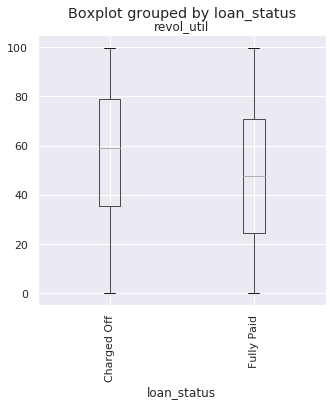

In [542]:

fig, ax = plt.subplots(figsize=(5,5))
df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

In [543]:
df['revol_util_bin'] = round(df['revol_util']/5)


/home/prabsy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


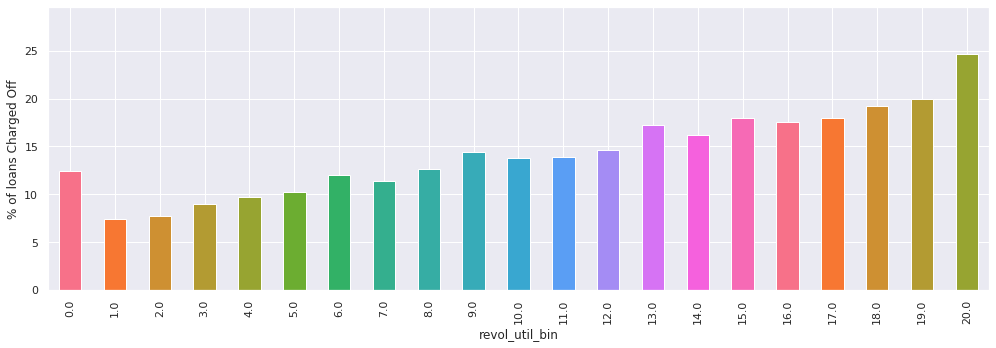

In [547]:

plt.figure(figsize=(14,5))
ax = plot_buckets_vs_loan_status(df, 'revol_util_bin','Charged Off')
plt.show()

## Col: total_acc
-  The total number of credit lines currently in the borrower's credit file.

In [549]:
df.total_acc.describe()


count    34595.000000
mean        22.006533
std         11.325500
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

<Figure size 1080x360 with 0 Axes>

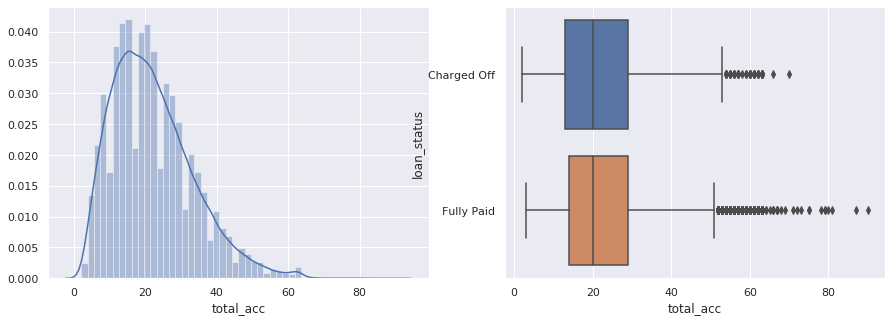

In [550]:
plt.figure(figsize=(15,5))

plot_distribution(df, 'total_acc')

**Summary**
-  ~22 avg credit lines for borrowers
-  There is no big difference between the Charged Off and Fully Paid credit lines

## Col :out_prncp
-  Remaining outstanding principal for total amount funded.

In [552]:
df.out_prncp.value_counts()


0.0    34595
Name: out_prncp, dtype: int64

In [553]:
df.groupby('loan_status')['out_prncp'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,29738.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Summary**
-  As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ingnored for analysis. Therefore out_prncp variable can be removed or droped.

In [554]:
df = df.drop('out_prncp',axis=1)


## Col: out_prncp_inv
-  Remaining outstanding principal for portion of total amount funded by investors

In [556]:
df.out_prncp_inv.value_counts()


0.0    34595
Name: out_prncp_inv, dtype: int64

In [557]:
df.groupby('loan_status')['out_prncp_inv'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4857.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,29738.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Summary**
-  As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ingnored for analysis. Therefore out_prncp_inv variable can be removed or droped.

## Col : total_pymnt
-  Payments received to date for total amount funded.

In [558]:
df.total_pymnt.describe()


count    34595.000000
mean     11894.639479
std       8715.646620
min         33.730000
25%       5571.765511
50%       9771.780948
75%      16114.050000
max      58563.679930
Name: total_pymnt, dtype: float64

In [559]:
# treating outliers
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = df[np.abs(df.total_pymnt-df.total_pymnt.mean()) <= (3*df.total_pymnt.std())]

In [560]:
df['total_pymnt'] = df['total_pymnt'].apply(lambda x : np.log(x))


<Figure size 1080x360 with 0 Axes>

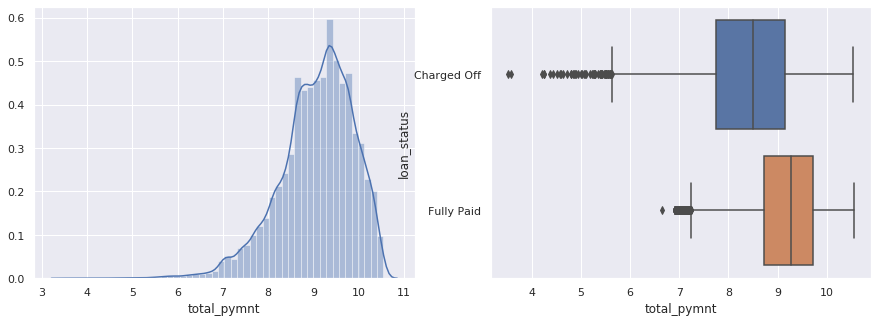

In [561]:
plt.figure(figsize=(15,5))
plot_distribution(df, 'total_pymnt')
plt.show()

**Summary**
-  The average payment received to date for the Charged Off loan is less than Fully Paid loans.
-  This variable is available only after loan is sanctioned, we can drop this

In [564]:
df = df.drop('total_pymnt',axis=1)


## Col total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee
- these columns can be dropped as it will not be availavle at the time of loan sanctioning

## Col : last_pymnt_d
-  Last month payment was received.

In [566]:
df.last_pymnt_d.value_counts().head()


2013-03-01    940
2014-12-01    846
2013-05-01    828
2013-02-01    795
2012-03-01    781
Name: last_pymnt_d, dtype: int64

In [567]:
df['last_pymnt_d_month']= df['last_pymnt_d'].dt.month
df['last_pymnt_d_year']= df['last_pymnt_d'].dt.year


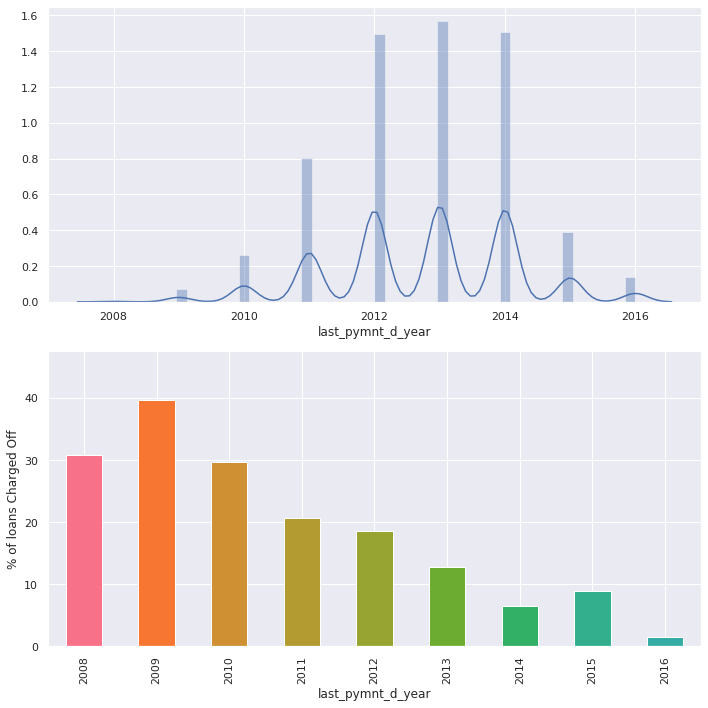

In [568]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.distplot(df['last_pymnt_d_year'])
plt.subplot(2, 1, 2)
plot_buckets_vs_loan_status(df, 'last_pymnt_d_year','Charged Off')
plt.show()

**Summary**
-  Most of the last payment date are from 2012to 2014
- 40% of loans with last payment date in 2009 are charged Off, mostly due to the recession in 2008

## Col: last_pymnt_amnt
-  Last total payment amount received.

In [570]:
df.last_pymnt_amnt.describe()


count    34072.000000
mean      2646.773471
std       4216.139446
min          0.010000
25%        220.410000
50%        570.625000
75%       3436.725000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

In [571]:
# Normalizing using log transformation
df['last_pymnt_amnt_log'] = df['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

<Figure size 1080x360 with 0 Axes>

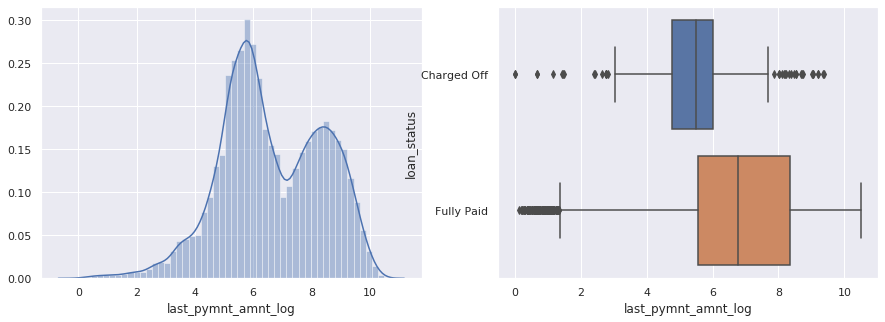

In [572]:
plt.figure(figsize=(15,5))

plot_distribution(df, 'last_pymnt_amnt_log')
plt.show()

**Summary**
- The last Payment amount received is very low for Charged Off borrowers compared to the Fully Paid borrowers. 

## Col : last_credit_pull_d
-  The most recent month LC pulled credit for this loan.

In [574]:
df.last_credit_pull_d.value_counts().head()


2016-05-01    8347
2016-04-01    2106
2016-03-01    1009
2013-02-01     753
2016-02-01     654
Name: last_credit_pull_d, dtype: int64

In [575]:

df['last_credit_pull_d_month']= df['last_credit_pull_d'].dt.month
df['last_credit_pull_d_year']= df['last_credit_pull_d'].dt.year

In [576]:
df.last_credit_pull_d_year.value_counts(normalize=True)


2016    0.372681
2014    0.162215
2015    0.145016
2013    0.135947
2012    0.106774
2011    0.054649
2010    0.017991
2009    0.004197
2008    0.000528
Name: last_credit_pull_d_year, dtype: float64

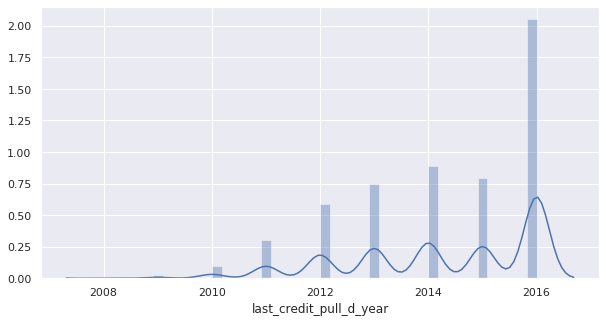

In [577]:

plt.figure(figsize=(10,5))
sns.distplot(df['last_credit_pull_d_year'])
plt.show()

**Summary**
-  Lending Club has started looking more into more credit reports recently
-  The company is taking defaulted loans seriously

# Bivariate Analysis

## avg. loan_amnt over time

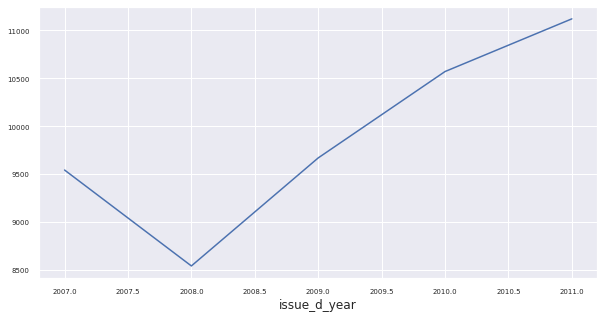

In [579]:
plt.figure(figsize=(10,5))
df.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

**Summary**
- Avg Loan amount dropped sharply in 2008 recession time

## loan_amnt over time

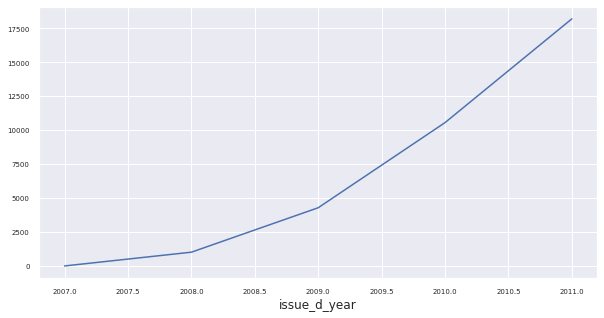

In [580]:
plt.figure(figsize=(10,5))
df.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

**Summary**
- Loan amount has increased almost linearly since 2007

## loan_amnt vs annual_inc

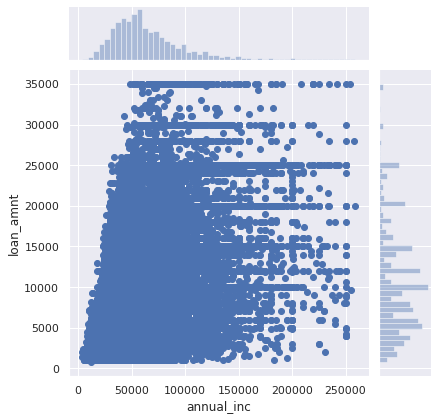

In [592]:

sns.jointplot('annual_inc', 'loan_amnt', df.loc[df['annual_inc']<260000])
plt.show()

**Summary**
-  Customers with low income are getting higher loans, risky
-  Borrowers with average income lower than 50000 taking loans of 25000 or higher.


##  verification_status vs loan status vs loan_amnt

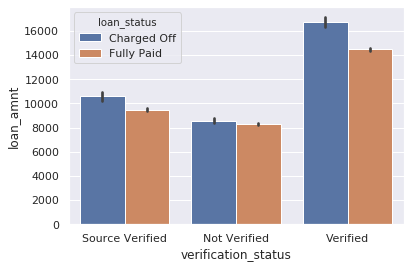

In [593]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)

**Summary**
-  When LC sanctions a loan with higher amount , it is mostly verified

## Interest Rate and Term

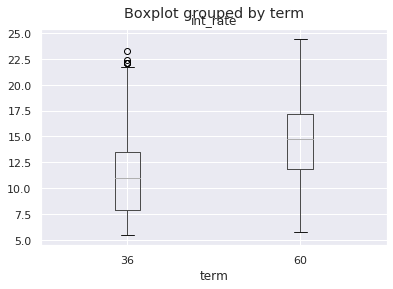

In [594]:
df.boxplot(column='int_rate', by='term')
plt.show()

**Summary**
-  Loans with higher amount have higher terms, which is natural

## Loan amount vs Grade vs Term

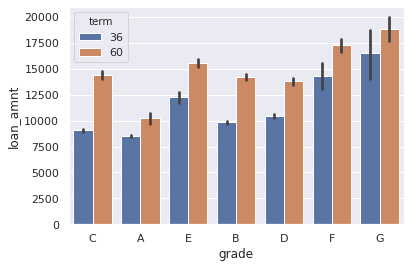

In [595]:

sns.barplot(x='grade', y='loan_amnt', hue="term", data=df, estimator=np.mean)
plt.show()

**Summary**
-  Low grade are offered higher loans for longer terms

## revol_util Vs grade Vs Loan Status¶


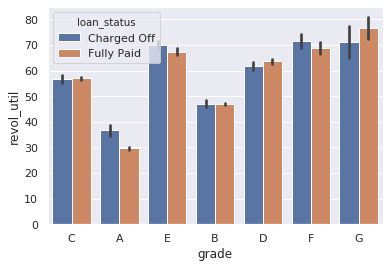

In [596]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=df, estimator=np.mean)
plt.show()

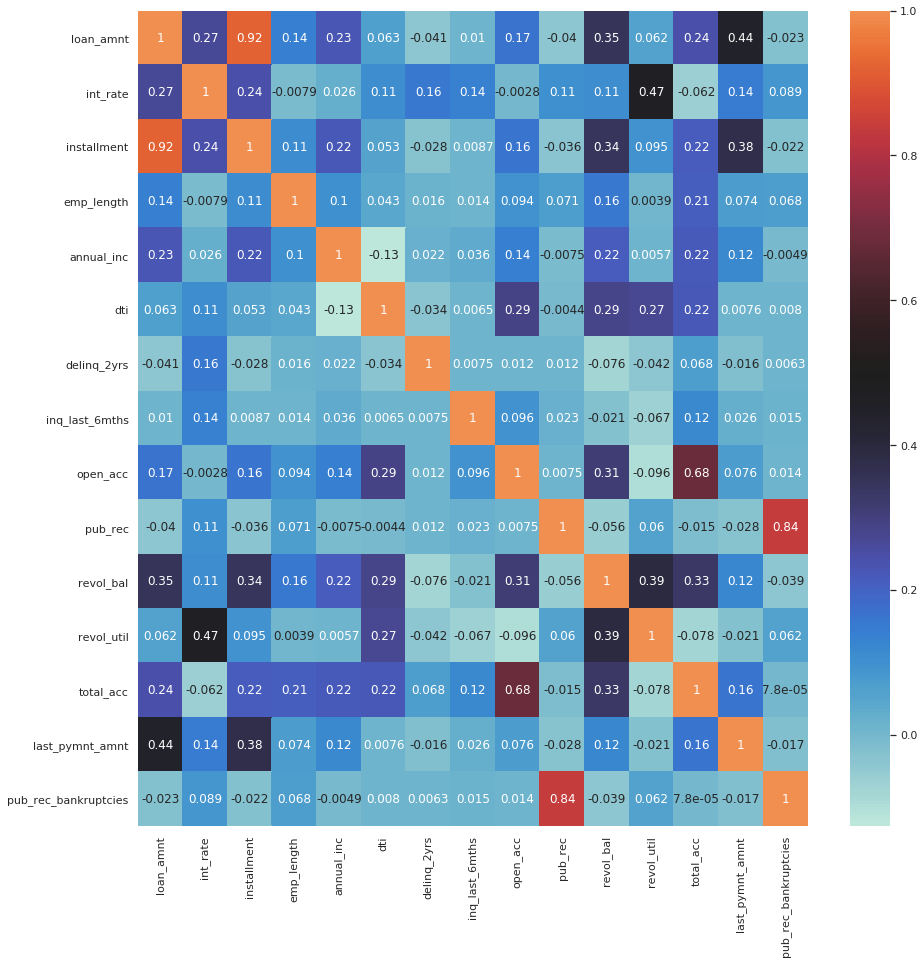

In [597]:
corr=df.corr()

plt.figure(figsize=(15,15))
num_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = df[num_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**Summary**
-  pub_rec and pub_rec_bankruptcies are highly correlated
-  open_accc and total_acc are orrelated
-  installment and loan_amt are correlated 
-  loan_amnt is correlated to last_payment_amount with r factor.44, as expected
-  int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
-  delinq_2yrs is totally not correlated with public record of bankruptcy. 

## Suggestions based on above analysis
-  **Stop approving loans where amount/income is higher than 30%**
-  **Reduce approvals for borrowers with purpose as small business**
-  **Stop approving high value loans when revolving line utilization rate is greater than 75%**
-  **Stop approving loans to people with prior bad record**
-  **Stop approving very high value loans**
-  **Start charging higher interest rates for loans with dti greater than 20** 